# ローカルにあるデータをフィーチャ レイヤーとして公開する
ここでは次の3つをArcGIS Online へ公開します。
* CSV
* シェープ ファイル(*.shp)
* ファイルジオデータベース(*.gdb)

おまけ
* PDFファイル(*.pdf)
* Microsoft Wordファイル(*.docx)


※これら2つは、ArcGIS Onlineに作成可能なフォルダに格納します。

そのほか ArcGIS API for Python を使ってArcGIS Online へ公開できるファイルは[こちら](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm)

※公開先
ArcGIS Developersから作成した無償アカウント、または既にお持ちの組織サイトのアカウントの両方で実践できます。

#### ユーザでログインする

In [1]:
# ArcGIS for Developers ログイン情報
develoersUser = ''
develoersPass = ''

<User username:wakanameeeko>
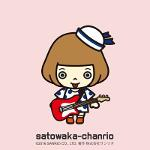

In [2]:
from arcgis.gis import GIS

gis = GIS("http://"+ develoersUser +".maps.arcgis.com/",develoersUser,develoersPass)
user = gis.users.get(develoersUser)
user

## CSVファイルを公開する
※緯度経度またはXYなど位置情報が含まれることが条件です

In [3]:
# csvファイルの読み込み
import pandas as pd
from IPython.display import display

csvfile = 'data/kanazawaParking.csv'
# データ内容の確認
dataflame = pd.read_csv(csvfile)
display(dataflame)

,X,Y,OBJECTID,id,公園名,駐車場名,親施設ID,親施設名称,経度,緯度,...,開所時間_Sa_Su,料金,料金_1,利用交通機関,収容台数_普通車,収容台数_大型,備考_管理者,備考,リンク,更新日
0,139.621626,35.362888,1,D7001,富岡西公園,NaN,P7009,富岡西公園,139.621626,35.362888,...,24時間,2時間300円以降20分50円,NaN,NaN,32,NaN,（財）横浜市緑の協会,NaN,http://park.hama-midorinokyokai.or.jp/parking-...,2013-04-01T00:00:00.000Z
1,139.634750,35.329050,2,D7002,野島公園,第１駐車場,P7007,野島公園,139.634750,35.329050,...,7:00～23:00,1時間200円以降30分100円,NaN,NaN,104,NaN,（財）横浜市緑の協会,NaN,http://www2.nojima-park.org/access/,2013-04-01T00:00:00.000Z
2,139.633681,35.329709,3,D7003,野島公園,第２駐車場,P7007,野島公園,139.633681,35.329709,...,7:00～23:00,1時間200円以降30分100円,NaN,NaN,52,NaN,（財）横浜市緑の協会,NaN,http://www2.nojima-park.org/access/,2013-04-01T00:00:00.000Z


In [4]:
# CSV ファイルのアップロード
parkingCsvItem = gis.content.add({},csvfile)

In [5]:
# FeatureService として公開
parkingCsvItem.publish()
parkingCsvItem

<Item title:"kanazawaParking" type:CSV owner:wakanameeeko>

## シェープ ファイルを公開する


In [6]:
# シェープ ファイルのアップロード
shpfile = 'data/yokohamaPolygonShp.zip'
ShpItem = gis.content.add({}, shpfile)

In [7]:
# FeatureService として公開
ShpItem.publish()

<Item title:"yokohamaPolygonShp" type:Feature Layer Collection owner:wakanameeeko>

## ファイルジオデータベースを公開する

In [8]:
# ファイルジオデータベースのアップロード
fgdb = 'data/kawasakiEscapeFGDB.zip'
fgdbItem = gis.content.add({ 'type': 'File Geodatabase' , 'title':'川崎避難所ファイルジオ'}, fgdb )

In [9]:
# FeatureService として公開
fgdbItem.publish()

<Item title:"川崎避難所ファイルジオ" type:Feature Layer Collection owner:wakanameeeko>

### おまけ1

* フォルダを作成してみよう
* PDFファイルをアップロードしてみよう

In [10]:
# 日付フォルダを作成する
from datetime import datetime as dt
tdatetime = dt.now()
today = tdatetime.strftime('%Y/%m/%d')
FolderName = 'geodev_'+ today
# ArcGIS Onlineへ フォルダを作成する
newFolder = gis.content.create_folder(FolderName)
newFolder

{'id': '5eb59a85f13e41858ea2a9c1b003420d',
 'title': 'geodev_2018/02/21',
 'username': 'wakanameeeko'}

In [11]:
pdffile = 'data/ESRIジャパンPDFファイル.pdf'
pdffileItem = gis.content.add({'type': 'PDF' }, pdffile)
pdffileItem

<Item title:"ESRIジャパンPDFファイル" type:PDF owner:wakanameeeko>

In [12]:
# フォルダ移動
pdffileItem.move(newFolder)

{'folder': '5eb59a85f13e41858ea2a9c1b003420d',
 'itemId': 'ce3c59acbd384c96b02fa088bd1fdbb9',
 'owner': 'wakanameeeko',
 'success': True}

### おまけ2

* フォルダ指定でWordファイルをアップロードしてみよう

In [14]:
wordfile = 'data/ESRIジャパンWordファイル.docx'
wordfileItem = gis.content.add({'type': 'Microsoft Word' }, wordfile , folder=newFolder.get('title'))
wordfileItem

<Item title:"ESRIジャパンWordファイル" type:Microsoft Word owner:wakanameeeko>

In [ ]:
# ArcGIS Onlineへログインして、コンテンツとフォルダを見てみましょう